In [18]:
import pandas as pd
import warnings
import seaborn as sns
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
warnings.simplefilter('ignore')

Populating the interactive namespace from numpy and matplotlib


In [19]:
df = pd.read_excel('density.xlsx')
df1 = pd.read_excel('data_medecins.xlsx')

In [20]:
df.head(2)

,Généralistes et compétences MEP,REGION INSEE,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.,Unnamed: 5,Unnamed: 6
0,01- Médecine générale,11- Ile-de-France,7503,1.224610e+07,61.268489,NaN,0.000613
1,01- Médecine générale,24- Centre-Val-de-Loire,1741,2.582500e+06,67.415299,NaN,NaN


In [21]:
df1.head(2)

,Généralistes et compétences MEP,REGION INSEE,NOMBRE D'APE,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENTS (Euros),TOTAL DES HONORAIRES (Euros),HONORAIRES SANS DEPASSEMENT /APE (Euros),DEPASSEMENTS /APE (Euros),FRAIS DE DEPLACEMENTS /APE (Euros),HONORAIRES /APE (Euros)
0,01- Médecine générale,11- Ile-de-France,5697,9.09628e+08,4.41758e+07,436920,9.54241e+08,159668,7754.22,76.693,167499
1,01- Médecine générale,24- Centre-Val-de-Loire,1409,2.37436e+08,1.70022e+06,989544,2.40125e+08,168514,1206.68,702.303,170422


In [22]:
df_fmep = df[:13]
df_hon = df1[:13]

In [23]:
df_fmep.head(2)

,Généralistes et compétences MEP,REGION INSEE,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.,Unnamed: 5,Unnamed: 6
0,01- Médecine générale,11- Ile-de-France,7503,1.224610e+07,61.268489,NaN,0.000613
1,01- Médecine générale,24- Centre-Val-de-Loire,1741,2.582500e+06,67.415299,NaN,NaN


In [24]:
df_hon.head(2)

,Généralistes et compétences MEP,REGION INSEE,NOMBRE D'APE,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENTS (Euros),TOTAL DES HONORAIRES (Euros),HONORAIRES SANS DEPASSEMENT /APE (Euros),DEPASSEMENTS /APE (Euros),FRAIS DE DEPLACEMENTS /APE (Euros),HONORAIRES /APE (Euros)
0,01- Médecine générale,11- Ile-de-France,5697,9.09628e+08,4.41758e+07,436920,9.54241e+08,159668,7754.22,76.693,167499
1,01- Médecine générale,24- Centre-Val-de-Loire,1409,2.37436e+08,1.70022e+06,989544,2.40125e+08,168514,1206.68,702.303,170422


In [25]:
df_fmep.columns

Index(['Généralistes et compétences MEP', 'REGION INSEE', 'EFFECTIF',
       'POPULATION FRANCAISE', 'DENSITE /100 000 hab.', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

In [26]:
df_hon.columns

Index(['Généralistes et compétences MEP', 'REGION INSEE', 'NOMBRE D'APE',
       'HONORAIRES SANS DEPASSEMENT (Euros)', 'DEPASSEMENTS (Euros)',
       'FRAIS DE DEPLACEMENTS (Euros)', 'TOTAL DES HONORAIRES (Euros)',
       'HONORAIRES SANS DEPASSEMENT /APE (Euros)', 'DEPASSEMENTS /APE (Euros)',
       'FRAIS DE DEPLACEMENTS /APE (Euros)', 'HONORAIRES /APE (Euros)'],
      dtype='object')

In [27]:
del df_fmep['Unnamed: 5']
del df_fmep['Unnamed: 6']

In [28]:
df_fmep.columns

Index(['Généralistes et compétences MEP', 'REGION INSEE', 'EFFECTIF',
       'POPULATION FRANCAISE', 'DENSITE /100 000 hab.'],
      dtype='object')

In [29]:
df_merge = df_fmep.merge(df_hon, on='REGION INSEE')

In [30]:
df_merge.head(3)

,Généralistes et compétences MEP_x,REGION INSEE,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.,Généralistes et compétences MEP_y,NOMBRE D'APE,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENTS (Euros),TOTAL DES HONORAIRES (Euros),HONORAIRES SANS DEPASSEMENT /APE (Euros),DEPASSEMENTS /APE (Euros),FRAIS DE DEPLACEMENTS /APE (Euros),HONORAIRES /APE (Euros)
0,01- Médecine générale,11- Ile-de-France,7503,1.224610e+07,61.268489,01- Médecine générale,5697,9.09628e+08,4.41758e+07,436920,9.54241e+08,159668,7754.22,76.693,167499
1,01- Médecine générale,24- Centre-Val-de-Loire,1741,2.582500e+06,67.415299,01- Médecine générale,1409,2.37436e+08,1.70022e+06,989544,2.40125e+08,168514,1206.68,702.303,170422
2,01- Médecine générale,27- Bourgogne et Franche-Comté,2128,2.813200e+06,75.643400,01- Médecine générale,1781,2.82277e+08,1.01297e+06,1.84651e+06,2.85137e+08,158494,568.764,1036.78,160099


In [31]:
df_merge = df_merge.rename(columns={'DEPASSEMENTS /APE (Euros)': 'dep'})

In [32]:
df_merge.head(3)

,Généralistes et compétences MEP_x,REGION INSEE,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.,Généralistes et compétences MEP_y,NOMBRE D'APE,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENTS (Euros),TOTAL DES HONORAIRES (Euros),HONORAIRES SANS DEPASSEMENT /APE (Euros),dep,FRAIS DE DEPLACEMENTS /APE (Euros),HONORAIRES /APE (Euros)
0,01- Médecine générale,11- Ile-de-France,7503,1.224610e+07,61.268489,01- Médecine générale,5697,9.09628e+08,4.41758e+07,436920,9.54241e+08,159668,7754.22,76.693,167499
1,01- Médecine générale,24- Centre-Val-de-Loire,1741,2.582500e+06,67.415299,01- Médecine générale,1409,2.37436e+08,1.70022e+06,989544,2.40125e+08,168514,1206.68,702.303,170422
2,01- Médecine générale,27- Bourgogne et Franche-Comté,2128,2.813200e+06,75.643400,01- Médecine générale,1781,2.82277e+08,1.01297e+06,1.84651e+06,2.85137e+08,158494,568.764,1036.78,160099


In [33]:
df_merge.columns

Index(['Généralistes et compétences MEP_x', 'REGION INSEE', 'EFFECTIF',
       'POPULATION FRANCAISE', 'DENSITE /100 000 hab.',
       'Généralistes et compétences MEP_y', 'NOMBRE D'APE',
       'HONORAIRES SANS DEPASSEMENT (Euros)', 'DEPASSEMENTS (Euros)',
       'FRAIS DE DEPLACEMENTS (Euros)', 'TOTAL DES HONORAIRES (Euros)',
       'HONORAIRES SANS DEPASSEMENT /APE (Euros)', 'dep',
       'FRAIS DE DEPLACEMENTS /APE (Euros)', 'HONORAIRES /APE (Euros)'],
      dtype='object')

Populating the interactive namespace from numpy and matplotlib


[Text(151.42187499999997, 0.5, 'Region'),
 Text(0.5, 52.5, "Dépassements d'honoraires moyens par APE"),
 Text(0.5, 1, "Dépassement d'honoraires par APE en fonction de la densité régionnale pour les médecins généralistes en France métropolitaine")]

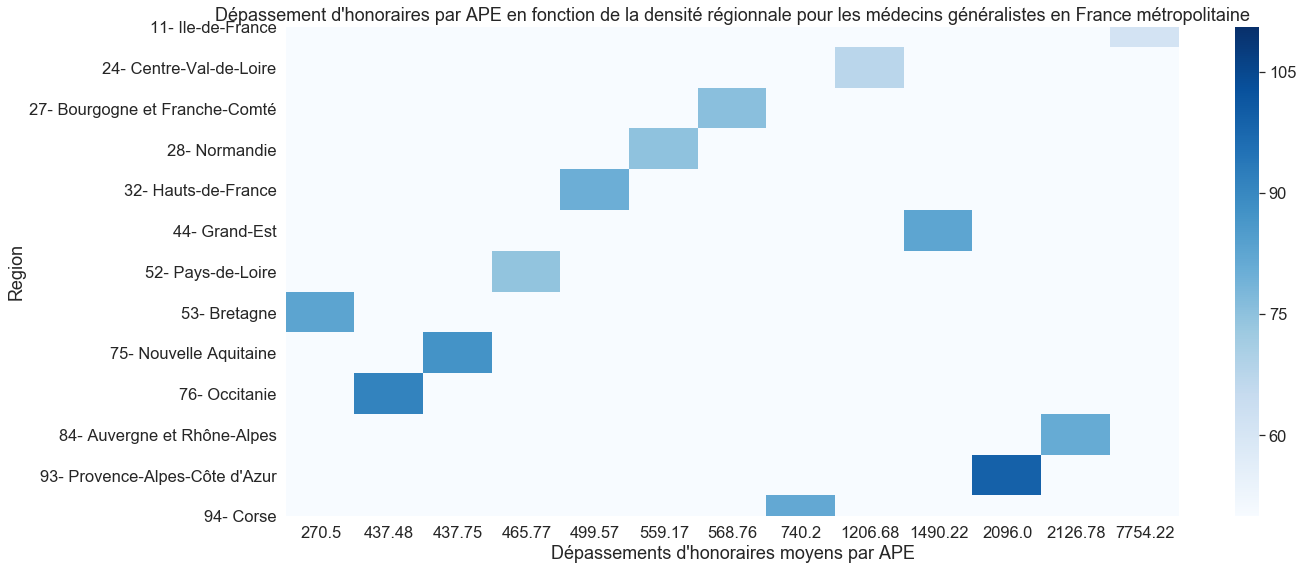

In [41]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 9)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.expand_frame_repr", True)

df_heatMap = df_merge.copy()
df_heatMap = df_heatMap[['REGION INSEE', "dep", "DENSITE /100 000 hab."]]
df_heatMap = df_heatMap.groupby(
    ['REGION INSEE', "dep", "DENSITE /100 000 hab."]).size()
df_heatMap = pd.DataFrame(df_heatMap)
df_heatMap.reset_index(inplace=True)

df_heatMap['dep'] = df_heatMap['dep'].round(decimals=2)

df_heatMap = df_heatMap.pivot('REGION INSEE', "dep", "DENSITE /100 000 hab.")

df_heatMap.fillna(0, inplace=True)
sns.set(font_scale=1.5)
ax = sns.heatmap(df_heatMap, vmin=50.0, vmax=110.5,
                 cmap='Blues', xticklabels=True, yticklabels=True)
ax.set(xlabel="Dépassements d'honoraires moyens par APE", ylabel='Region',
       title="Dépassement d'honoraires par APE en fonction de la densité régionnale pour les médecins généralistes en France métropolitaine")

**La carte représentée ci-dessus permet d'analyser le dépassement d'honoraires moyen pratiqué par les médecins généralistes en France métropolitaine en fonction de la densité de médecins généralistes/100 000 habitants par région en France métropolitaine.**